## Import dependencies

In [ ]:
# !pip install pytorch-tabnet

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc("font", size=13)
from tqdm import trange
from torch import optim
from pytorch_tabnet.tab_model import TabNetClassifier
from pytorch_tabnet.pretraining import TabNetPretrainer
import warnings
warnings.filterwarnings('ignore')

## Import processed data

In [2]:
# Train data
x_train = np.load("data/processed/x_train.npy")
# Train labels
x_test = np.load("data/processed/x_test.npy")
# Test data
y_train = np.load("data/processed/y_train.npy")
# Test labels
y_test = np.load("data/processed/y_test.npy")

## TabNet

In [7]:
max_epochs = 100

In [4]:
# # TabNetPretrainer
# unsupervised_model = TabNetPretrainer(
#     optimizer_fn=optim.Adam,
#     optimizer_params=dict(lr=2e-2),
#     mask_type='entmax' # "sparsemax"
# )

# unsupervised_model.fit(
#     X_train=x_train,
#     pretraining_ratio=0.8,
# )

clf = TabNetClassifier(
    optimizer_fn=optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params={"step_size":10, # how to use learning rate scheduler
                      "gamma":0.9},
    scheduler_fn=optim.lr_scheduler.StepLR,
    mask_type='sparsemax' # This will be overwritten if using pretrain model
)

clf.fit(
    X_train=x_train, y_train=y_train,
    max_epochs=max_epochs,
    from_unsupervised=unsupervised_model
)

epoch 0  | loss: 2.56725 |  0:00:30s
epoch 1  | loss: 1.42639 |  0:01:03s
epoch 2  | loss: 1.41408 |  0:02:19s
epoch 3  | loss: 1.42263 |  0:03:27s
epoch 4  | loss: 1.40938 |  0:04:02s
epoch 5  | loss: 1.40694 |  0:04:32s
epoch 6  | loss: 1.39976 |  0:05:02s
epoch 7  | loss: 1.40022 |  0:05:37s
epoch 8  | loss: 1.39195 |  0:06:11s
epoch 9  | loss: 1.39434 |  0:06:35s
epoch 10 | loss: 1.38599 |  0:07:15s
epoch 11 | loss: 1.38983 |  0:07:43s
epoch 12 | loss: 1.38611 |  0:08:10s
epoch 13 | loss: 1.38005 |  0:08:37s
epoch 14 | loss: 1.38016 |  0:09:02s
epoch 15 | loss: 1.37783 |  0:09:35s
epoch 16 | loss: 1.37475 |  0:10:10s
epoch 17 | loss: 1.37305 |  0:10:47s
epoch 18 | loss: 1.36448 |  0:11:10s
epoch 19 | loss: 1.35878 |  0:11:36s
epoch 20 | loss: 1.3663  |  0:12:00s
epoch 21 | loss: 1.36313 |  0:12:25s
epoch 22 | loss: 1.36693 |  0:12:56s
epoch 23 | loss: 1.35797 |  0:13:32s
epoch 24 | loss: 1.35477 |  0:13:57s
epoch 25 | loss: 1.36621 |  0:14:21s
epoch 26 | loss: 1.34846 |  0:14:51s
e

KeyboardInterrupt: 

In [5]:
preds = clf.predict(x_test)

In [6]:
print(f"Accuracy: {(np.where((preds - y_test) == 0)[0].size / y_test.size):.1%}")

Accuracy: 79.6%


### TabNet built-in interpretations

In [12]:
clf._compute_feature_importances(x_test)

array([0.09335547, 0.04864026, 0.07277802, 0.03490794, 0.02568043,
       0.03428305, 0.01078658, 0.40482405, 0.02427086, 0.00291215,
       0.03201533, 0.03549908, 0.08961348, 0.04289065, 0.04754264])

In [13]:
explain_matrix, masks = clf.explain(x_test)

In [24]:
lab = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']

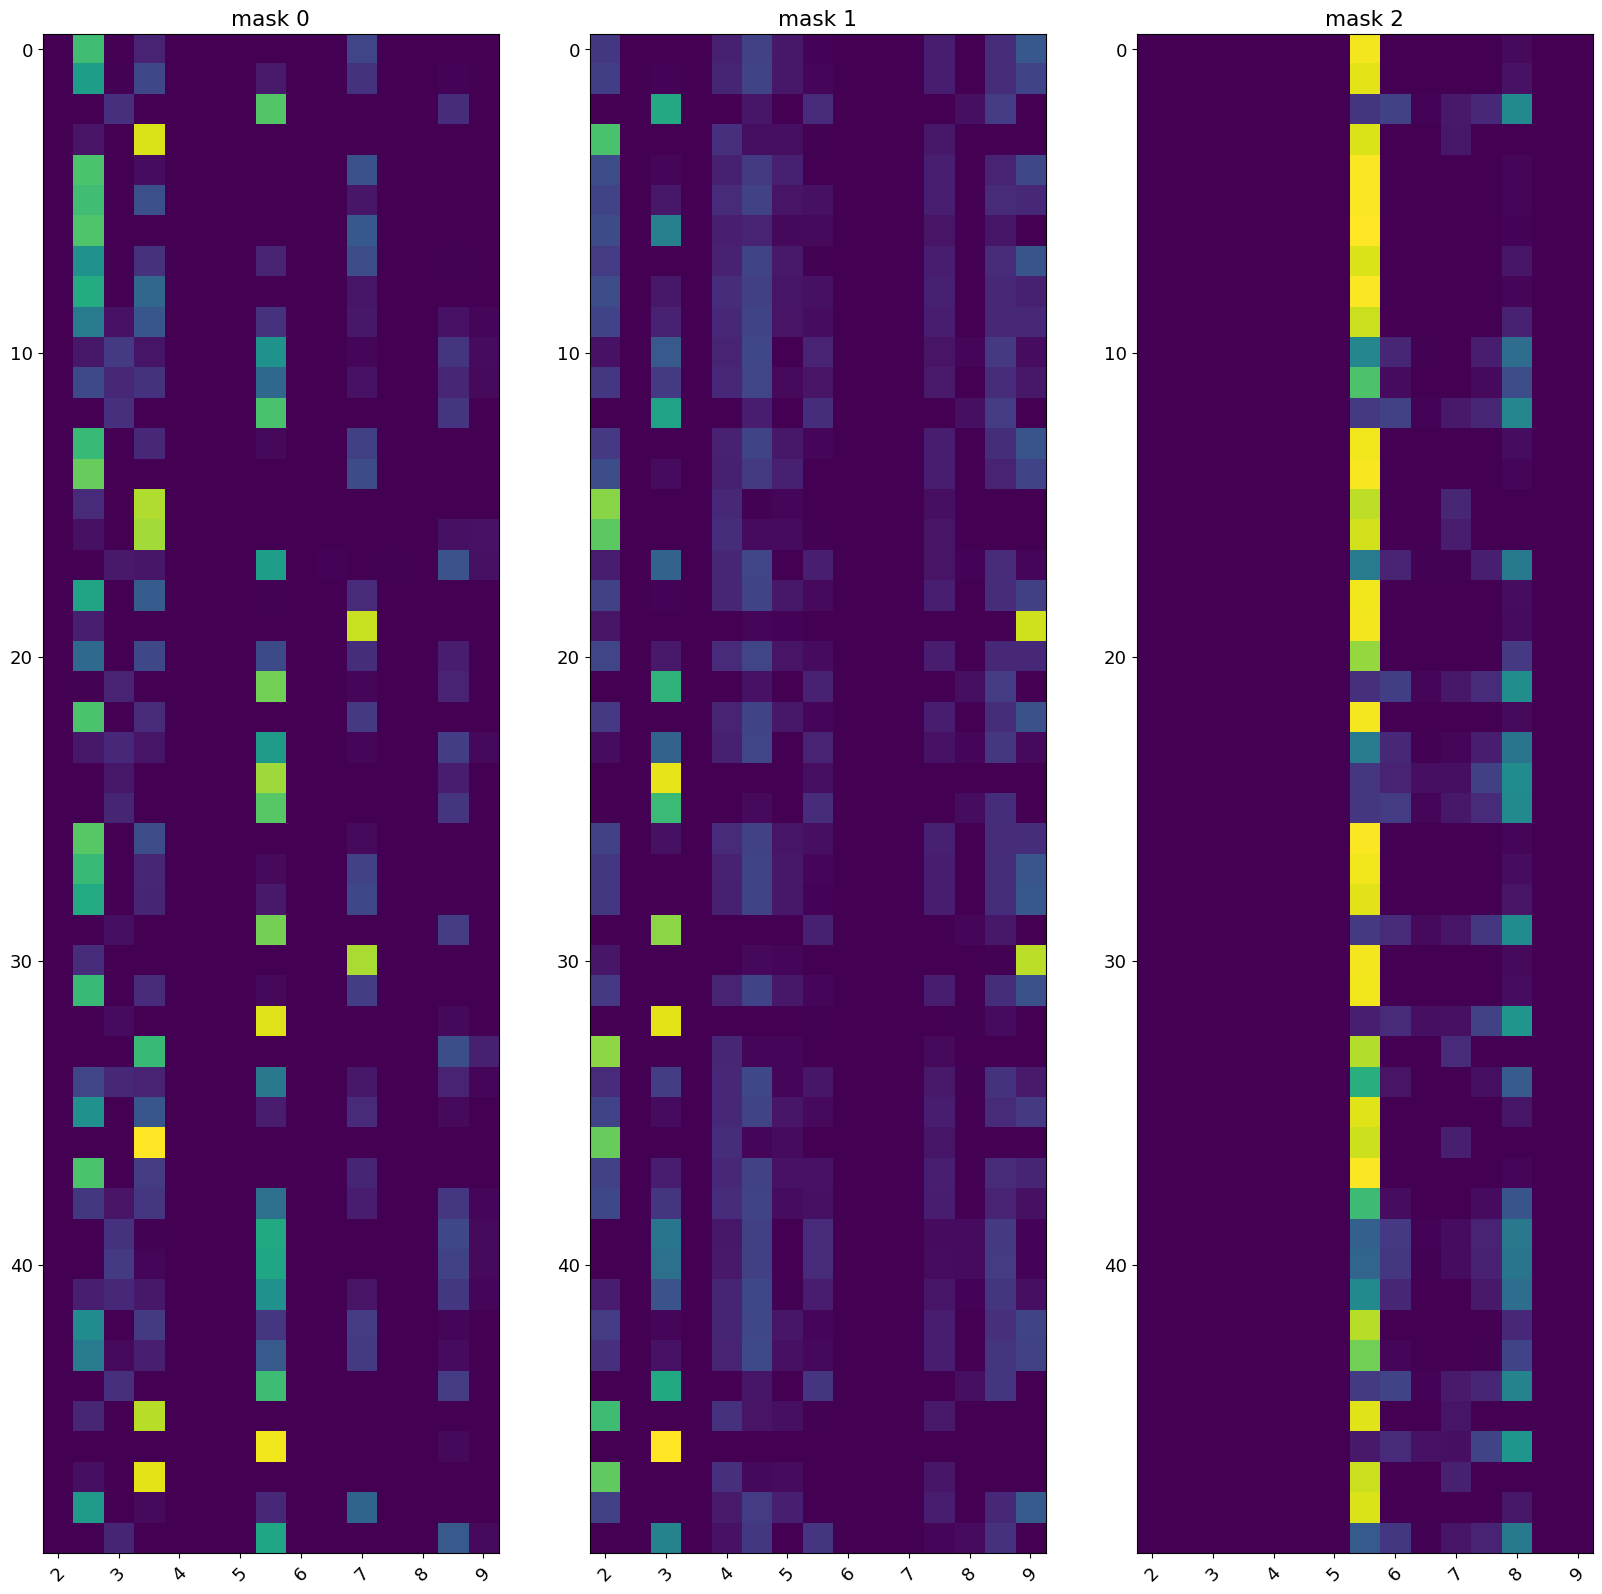

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(20,20))

for i in range(3):
    axs[i].imshow(masks[i][:50])
    axs[i].set_title(f"mask {i}")
    axs[i].set_xticklabels(labels = lab, rotation=45)

## Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', max_depth = 3, random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, random_state=0)

In [29]:
y_pred = classifier.predict(x_test)
rftrain = classifier.score(x_train , y_train)
rftest = classifier.score(x_test , y_test)

In [32]:
print(f"Accuracy: {(np.where((y_pred - y_test) == 0)[0].size / y_test.size):.1%}")

Accuracy: 79.7%


In [30]:
print(rftrain, rftest)

0.7915959379374014 0.7966586259269186


In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.22      0.35      5579
           1       0.79      0.99      0.88     16807

    accuracy                           0.80     22386
   macro avg       0.82      0.60      0.62     22386
weighted avg       0.81      0.80      0.75     22386

